<h1>Trabalho final de Inteligência Artificial</h1>

<h5>Iarah Gonçalves de Almeida</h5>
<h5>Paulo Augusto Borges de Matos</h5>
<h5>David Walter Jansen</h5>

<h3>Bibliotecas necessárias</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

<h3>Carregando a base de dados</h3>

As 17 características extraídas dos experimentos <b>c1</b>, <b>c4</b> e <b>c6</b> foram armazenadas em arquivos no formato .mat do Matlab (<i>x1_17.mat</i>, <i>x4_17.mat</i> e <i>x6_17.mat</i>), bem como as medições do desgaste máximo dos experimentos (<i>yt1.mat</i>, <i>yt4.mat</i> e <i>yt6.mat</i>). Em seguida, os arquivos .mat foram convertidos para o formato .csv através de um script do Matlab e, então, carregados através do Pandas. O nome das colunas da base de dados também é definida.

In [2]:
names = ['rmsFX', 'maxFX', 'stdFX', 'rmsFY', 'maxFY', 'stdFY', 'rmsFZ', 'maxFZ', 'stdFZ', 'rmsVX', 'kVX', 'rmsVY', 'kVY', 'rmsVZ', 'kVZ', 'meanEA', 'stdEA']
target = ['maxDesg']
df1 = pd.read_csv('x1.csv', names = names)
df4 = pd.read_csv('x4.csv', names = names)
df6 = pd.read_csv('x6.csv', names = names)
df_yt1 = pd.read_csv('yt1.csv', names = target)
df_yt4 = pd.read_csv('yt4.csv', names = target)
df_yt6 = pd.read_csv('yt6.csv', names = target)
print(df1.shape);
print(df4.shape);
print(df6.shape);
print(df_yt1.shape);
print(df_yt4.shape);
print(df_yt6.shape);

(315, 17)
(315, 17)
(315, 17)
(315, 1)
(315, 1)
(315, 1)


Inclusão da coluna de desgaste máximo nos DataFrames dos experimentos.

In [3]:
df1['maxDesg'] = df_yt1['maxDesg']
df4['maxDesg'] = df_yt4['maxDesg']
df6['maxDesg'] = df_yt6['maxDesg']

<h3>Conhecendo a base de dados</h3>

Formato das bases de dados dos 3 experimentos.

In [4]:
df1.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,0.93297,3.744,0.84247,1.7529,10.724,1.6360,1.3298,4.560,1.1275,0.076914,3.1323,0.077509,3.1255,0.078697,3.1329,-0.000060,0.002230,48.893
1,2.12960,8.427,1.86500,3.3427,14.302,3.1500,1.9706,7.410,1.6836,0.085411,3.2752,0.085716,3.2360,0.087895,3.2774,0.038556,0.012941,49.571
2,3.20850,11.534,2.67210,5.3579,20.826,4.8160,3.2554,11.815,2.6897,0.095767,3.2627,0.094333,3.1945,0.098742,3.2432,0.066571,0.019153,50.303
3,3.65870,11.788,2.99260,6.1656,24.148,5.5325,3.7204,12.852,3.1213,0.099040,3.1920,0.097245,3.1430,0.102260,3.1314,0.080003,0.022860,51.084
4,4.11040,12.555,2.97980,6.2097,24.337,5.7474,3.4897,11.704,3.2947,0.085091,3.3030,0.084096,3.2531,0.092056,3.1694,0.089196,0.024688,52.250


In [5]:
df4.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,2.5039,6.974,1.6977,2.8114,11.453,2.4989,1.4523,5.565,1.4112,0.076008,3.0407,0.076204,3.0353,0.078940,3.0300,0.031739,0.011924,31.416
1,2.5039,6.974,1.6977,2.8114,11.453,2.4989,1.4523,5.565,1.4112,0.076008,3.0407,0.076204,3.0353,0.078940,3.0300,0.031739,0.011924,34.893
2,3.5827,9.765,2.6111,4.8845,19.054,4.4938,2.2215,7.866,2.1286,0.083401,3.1219,0.080641,3.0336,0.086471,3.0513,0.056294,0.017970,38.103
3,4.2697,11.524,3.1355,5.9669,23.878,5.5030,2.8719,10.008,2.7291,0.084174,3.2141,0.081514,3.1221,0.088409,3.1438,0.074630,0.024345,41.061
4,3.7905,11.112,2.8576,5.8572,20.085,5.4858,3.1242,10.688,2.8077,0.083719,3.1951,0.081450,3.0689,0.089046,3.0824,0.074917,0.023768,43.781


In [6]:
df6.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,1.0182,3.658,0.84082,1.4308,5.915,1.1755,1.0135,3.773,1.0049,0.063757,4.1869,0.065580,4.1207,0.068373,4.0671,0.002320,0.004033,62.789
1,2.1354,7.369,1.40150,3.1953,12.901,2.6344,2.2173,7.631,2.1500,0.074639,3.2204,0.081759,3.0686,0.085200,3.1893,0.054203,0.015408,64.136
2,3.1507,9.726,1.94460,4.7750,19.025,3.9705,3.4121,9.747,3.2556,0.079383,3.3560,0.096047,2.9869,0.103450,3.1999,0.083658,0.022583,65.365
3,3.6598,10.755,2.26780,5.4765,21.510,4.5200,3.8300,10.624,3.6368,0.085467,3.3535,0.103610,2.9794,0.114660,3.6656,0.100170,0.026011,66.487
4,3.6672,11.007,2.24420,5.2781,22.179,4.5610,3.9026,10.588,3.6753,0.093899,3.1025,0.115170,2.8889,0.126000,3.1176,0.108810,0.030732,67.511


Descrição das bases de dados dos 3 experimentos.

In [7]:
df1.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,25.198839,57.466302,17.982989,12.065620,50.056917,10.631081,17.477368,45.973737,16.152775,0.124853,3.397320,0.118562,3.141273,0.139238,3.335517,0.122449,0.033409,113.905130
std,23.526890,45.273645,15.211930,4.415628,14.659606,4.146117,9.434308,21.013097,8.907682,0.041693,0.180502,0.039223,0.086938,0.039919,0.257750,0.024091,0.006341,27.820104
min,0.932970,3.744000,0.842470,1.752900,10.724000,1.636000,1.329800,4.560000,1.127500,0.076914,3.058400,0.075509,3.005800,0.078697,2.972800,-0.000060,0.002230,48.893000
25%,7.561350,18.195000,4.315300,8.544600,39.251000,7.277450,9.286600,28.261000,8.283050,0.090669,3.230950,0.085730,3.077700,0.105340,3.090650,0.112070,0.030212,94.569000
50%,14.825000,36.399000,11.677000,10.460000,45.908000,8.701200,15.127000,39.874000,14.124000,0.104190,3.386000,0.097411,3.125500,0.122210,3.320800,0.119160,0.033016,104.680000
75%,42.360500,100.990000,30.267000,15.774500,62.225000,14.176000,26.377000,67.602000,24.520500,0.167025,3.551250,0.152890,3.186200,0.179075,3.559750,0.123670,0.035234,133.495000
max,107.120000,178.400000,51.393000,24.160000,106.630000,22.878000,34.127000,79.475000,31.900000,0.218340,3.757500,0.202940,3.567000,0.228960,4.123800,0.247880,0.084318,172.690000


In [8]:
df4.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000
mean,22.398581,54.706356,19.154030,11.410154,48.131286,9.762487,17.837170,47.855352,16.521356,0.124251,3.348451,0.113351,3.079271,0.137821,3.21337,0.113393,0.035393,106.399590
std,16.800852,38.984989,16.304194,3.769644,11.523523,3.439665,9.303481,22.168387,8.721440,0.043308,0.188944,0.035714,0.112243,0.041579,0.22353,0.029206,0.006759,38.597398
min,2.503900,6.974000,1.697700,2.811400,11.453000,2.498900,1.452300,5.565000,1.411200,0.076008,3.040700,0.076204,2.882900,0.078940,2.86460,0.031739,0.011924,31.416000
25%,7.837550,17.852500,4.213800,8.469450,40.175000,7.031050,10.047500,29.313000,9.400350,0.089943,3.183050,0.085511,3.006300,0.102990,3.06745,0.104370,0.032184,84.845500
50%,16.192000,41.482000,12.949000,10.129000,47.561000,8.375000,16.299000,44.503000,15.050000,0.108540,3.337600,0.098807,3.060700,0.128480,3.13550,0.108440,0.034553,97.944000
75%,35.477000,86.859500,31.670000,14.467000,58.526500,12.505500,25.594500,66.786500,23.786500,0.148295,3.487350,0.130750,3.134350,0.159980,3.29605,0.113080,0.037290,116.070000
max,57.109000,134.910000,52.973000,18.873000,67.934000,16.960000,34.457000,86.577000,32.461000,0.248060,4.180800,0.209950,3.503100,0.256040,4.01510,0.337010,0.089516,210.920000


In [9]:
df6.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,22.182674,54.988121,18.751136,10.57573,44.760356,8.454232,17.210373,44.955527,15.809857,0.195185,4.033657,0.278071,3.296831,0.262944,4.158720,0.113057,0.030478,139.764473
std,16.479128,38.831955,16.010792,3.34637,10.358739,2.867876,8.679783,20.971199,8.196842,0.090604,0.389176,0.117994,0.391397,0.143853,0.387657,0.023516,0.004101,46.783737
min,1.018200,3.658000,0.840820,1.43080,5.915000,1.175500,1.013500,3.773000,1.004900,0.063757,3.102500,0.065580,2.715200,0.068373,3.026500,0.002320,0.004033,62.789000
25%,8.307000,19.353000,4.829100,8.01345,37.514500,6.285550,10.149500,28.513000,9.002800,0.108800,3.721300,0.174080,2.897300,0.142055,3.963350,0.102660,0.027327,111.150000
50%,16.190000,42.406000,12.596000,9.37840,43.545000,7.161400,15.521000,41.000000,14.492000,0.171170,4.168800,0.259490,3.359400,0.197930,4.118400,0.109830,0.030929,122.230000
75%,34.781500,85.510500,30.995500,13.33250,52.179000,10.676500,24.835500,61.997000,23.037000,0.291495,4.308800,0.416460,3.667200,0.387430,4.360800,0.115205,0.033263,168.460000
max,54.773000,128.990000,50.684000,17.44400,64.877000,14.324000,33.688000,85.408000,31.047000,0.357240,4.909600,0.460880,4.120700,0.545240,5.432700,0.249320,0.045366,234.720000


Checagem dos tipos de valores das bases de dados dos 3 experimentos.

In [10]:
df1.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


In [11]:
df4.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


In [12]:
df6.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


Visualização da relação entre o desgaste máximo e a RMS da vibração em Y das bases de dados dos 3 experimentos.

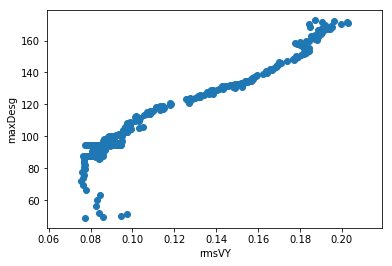

In [13]:
plt.scatter(df1.rmsVY, df1.maxDesg)
plt.xlabel('rmsVY')
plt.ylabel('maxDesg')
plt.show()

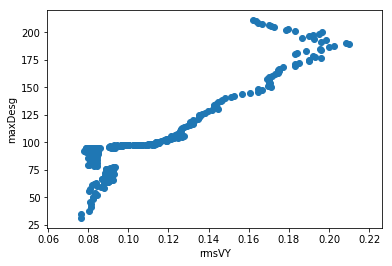

In [14]:
plt.scatter(df4.rmsVY, df4.maxDesg)
plt.xlabel('rmsVY')
plt.ylabel('maxDesg')
plt.show()

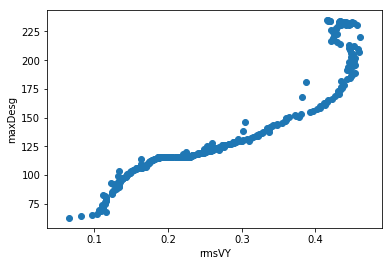

In [15]:
plt.scatter(df6.rmsVY, df6.maxDesg)
plt.xlabel('rmsVY')
plt.ylabel('maxDesg')
plt.show()

Trabalhando as bases de dados dos 3 experimentos.

In [16]:
# Isola as 17 características
X1 = df1.iloc[:,0:17]
X4 = df4.iloc[:,0:17]
X6 = df6.iloc[:,0:17]

# Escolhe o desgaste máximo
Y1 = df1.iloc[:,-1]
Y4 = df4.iloc[:,-1]
Y6 = df6.iloc[:,-1]

# Seleciona o nome das 17 características
names = df1.columns.values
names = names[:17]

<h3>Seleção de características com árvore de decisão</h3>

<h4>Random Forest Regressor</h4>

Construção da floresta aleatória e da importância das características para os 3 experimentos.

In [17]:
# Constrói o modelo de regressão com 100 árvores na floresta aleatória
regressor1 = RandomForestRegressor(n_estimators = 100)
regressor4 = RandomForestRegressor(n_estimators = 100)
regressor6 = RandomForestRegressor(n_estimators = 100)

# Importância das características
importance1 = 0
importance4 = 0
importance6 = 0

for i in range(10):
    # Divide o dataframe em conjunto de treinamento e conjunto de teste, com 33% das amostras para o conjunto de teste
    XTrain1, XTest1, YTrain1, YTrue1 = train_test_split(X1, Y1, test_size = 0.33)
    XTrain4, XTest4, YTrain4, YTrue4 = train_test_split(X4, Y4, test_size = 0.33)
    XTrain6, XTest6, YTrain6, YTrue6 = train_test_split(X6, Y6, test_size = 0.33)
    for j in range(10):
        # Ajusta o modelo de regressão
        regressor1.fit(X1, Y1)
        regressor4.fit(X4, Y4)
        regressor6.fit(X6, Y6)
        YPred1 = regressor1.predict(XTest1)
        YPred4 = regressor4.predict(XTest4)
        YPred6 = regressor6.predict(XTest6)
        # Soma as importâncias das características (quanto maior, mais importante)
        importance1 = importance1 + regressor1.feature_importances_
        importance4 = importance4 + regressor4.feature_importances_
        importance6 = importance6 + regressor6.feature_importances_

<h4>Exibição dos resultados</h4>

Exibição da importância das características para cada um dos experimentos.

In [18]:
print(sorted(zip(map(lambda x: round(x, 17), importance1), names), reverse = True))

[(17.05138756529666, 'rmsVY'), (15.20440109129263, 'stdFY'), (13.062062987312139, 'stdFX'), (11.87312445318738, 'stdFZ'), (9.420860542034632, 'rmsFX'), (9.14188472914545, 'rmsFY'), (7.884301655649603, 'rmsFZ'), (5.314315939349632, 'maxFZ'), (4.61778680401992, 'maxFX'), (2.830918259223181, 'rmsVX'), (1.6572936863832142, 'rmsVZ'), (0.9957027194878051, 'maxFY'), (0.704875357850668, 'meanEA'), (0.12147163102411199, 'stdEA'), (0.0672373557545498, 'kVY'), (0.03903546626878779, 'kVZ'), (0.01333975671963839, 'kVX')]


In [19]:
print(sorted(zip(map(lambda x: round(x, 17), importance4), names), reverse = True))

[(19.12556022839357, 'rmsFX'), (14.365796276289718, 'rmsVY'), (14.269770515039083, 'stdFX'), (12.225677682688637, 'maxFX'), (9.287520112018921, 'stdFY'), (8.980993118118073, 'rmsFY'), (6.861704936683611, 'rmsVX'), (5.101059866603143, 'meanEA'), (2.7270691017432314, 'rmsVZ'), (2.214064641592968, 'stdFZ'), (1.458198651847492, 'kVZ'), (1.008200538373009, 'kVY'), (0.9741148997253343, 'rmsFZ'), (0.8053912407565968, 'maxFZ'), (0.39753336041954135, 'maxFY'), (0.1653597929851994, 'stdEA'), (0.03198503672186385, 'kVX')]


In [20]:
print(sorted(zip(map(lambda x: round(x, 17), importance6), names), reverse = True))

[(12.362039333034598, 'stdFY'), (12.333337586859502, 'rmsVY'), (10.767309864161202, 'stdFX'), (10.532502257283879, 'rmsFX'), (10.351987979919393, 'rmsVZ'), (9.868573088081245, 'maxFX'), (7.294501053363917, 'rmsFZ'), (7.0636161524265955, 'rmsFY'), (6.99100581072829, 'stdFZ'), (6.277996681234923, 'rmsVX'), (5.034071319758456, 'maxFZ'), (0.7153753092827435, 'maxFY'), (0.1950075820056246, 'meanEA'), (0.11151119497199088, 'kVY'), (0.04259216210195267, 'stdEA'), (0.03610477013962254, 'kVZ'), (0.02246785464607552, 'kVX')]


Exibição da soma das importâncias das características dos 3 experimentos.

In [21]:
importances = importance1 + importance4 + importance6
print(sorted(zip(map(lambda x: round(x, 17), importances), names), reverse = True))

[(43.75052142844588, 'rmsVY'), (39.07892302771208, 'rmsFX'), (38.09914336651242, 'stdFX'), (36.85396053634615, 'stdFY'), (26.7120375747898, 'maxFX'), (25.18649399969012, 'rmsFY'), (21.07819490550864, 'stdFZ'), (16.152917608738854, 'rmsFZ'), (15.970619877141711, 'rmsVX'), (14.73635076804584, 'rmsVZ'), (11.153778499864686, 'maxFZ'), (6.0009428064594355, 'meanEA'), (2.1086113891900897, 'maxFY'), (1.5333388882559027, 'kVZ'), (1.1869490890995498, 'kVY'), (0.32942358611126404, 'stdEA'), (0.06779264808757776, 'kVX')]


<h4>Visualização da importância das 17 características</h4>

Ordenação das características mais relevantes.

In [22]:
# Ordena as importânticas das características 
sortedImportances1 = np.argsort(importance1)
sortedImportances4 = np.argsort(importance4)
sortedImportances6 = np.argsort(importance6)
sortedImportances = np.argsort(importances)

Plotagens dos gráficos para visualização da importância das características para cada um dos experimentos.

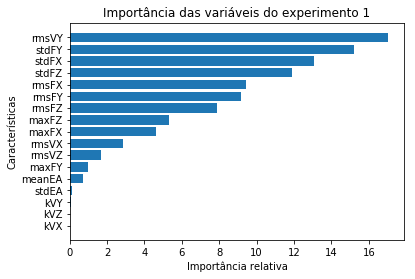

In [23]:
# Plota os dados
plt.barh(names, importance1[sortedImportances1], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sortedImportances1])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 1")

# Exibe a plotagem
plt.show()

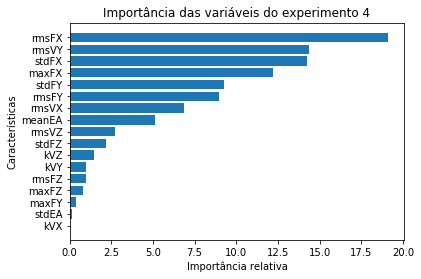

In [24]:
# Plota os dados
plt.barh(names, importance4[sortedImportances4], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sortedImportances4])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 4")

# Exibe a plotagem
plt.show()

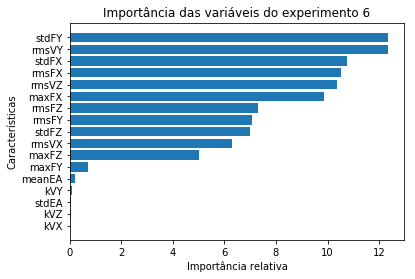

In [25]:
# Plota os dados
plt.barh(names, importance6[sortedImportances6], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sortedImportances6])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 6")

# Exibe a plotagem
plt.show()

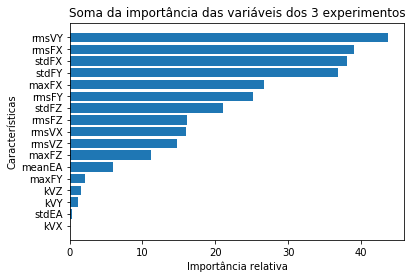

In [26]:
# Plota os dados
plt.barh(names, importances[sortedImportances], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sortedImportances])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Soma da importância das variáveis dos 3 experimentos")

# Exibe a plotagem
plt.show()

A partir do experimento acima, vamos descartar as características menos importantes para a predição do desgaste. Arbitrariamente, todas as características que obtiveram uma importância menor que 10 na soma dos 3 experimentos serão retiradas para as próximas análises e modelagens.

Neste sentido, maxFY, meanEA, stdEA, kVX, kVY e kVZ serão descartadas.

In [27]:
# Descarta as características menos importantes
X1 = df1.drop(['maxFY', 'meanEA', 'stdEA', 'kVX', 'kVY', 'kVZ'], axis = 1)
X4 = df4.drop(['maxFY', 'meanEA', 'stdEA', 'kVX', 'kVY', 'kVZ'], axis = 1)
X6 = df6.drop(['maxFY', 'meanEA', 'stdEA', 'kVX', 'kVY', 'kVZ'], axis = 1)

In [28]:
X1.head(5)

,rmsFX,maxFX,stdFX,rmsFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,0.93297,3.744,0.84247,1.7529,1.6360,1.3298,4.560,1.1275,0.076914,0.077509,0.078697,48.893
1,2.12960,8.427,1.86500,3.3427,3.1500,1.9706,7.410,1.6836,0.085411,0.085716,0.087895,49.571
2,3.20850,11.534,2.67210,5.3579,4.8160,3.2554,11.815,2.6897,0.095767,0.094333,0.098742,50.303
3,3.65870,11.788,2.99260,6.1656,5.5325,3.7204,12.852,3.1213,0.099040,0.097245,0.102260,51.084
4,4.11040,12.555,2.97980,6.2097,5.7474,3.4897,11.704,3.2947,0.085091,0.084096,0.092056,52.250


In [29]:
X4.head(5)

,rmsFX,maxFX,stdFX,rmsFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,2.5039,6.974,1.6977,2.8114,2.4989,1.4523,5.565,1.4112,0.076008,0.076204,0.078940,31.416
1,2.5039,6.974,1.6977,2.8114,2.4989,1.4523,5.565,1.4112,0.076008,0.076204,0.078940,34.893
2,3.5827,9.765,2.6111,4.8845,4.4938,2.2215,7.866,2.1286,0.083401,0.080641,0.086471,38.103
3,4.2697,11.524,3.1355,5.9669,5.5030,2.8719,10.008,2.7291,0.084174,0.081514,0.088409,41.061
4,3.7905,11.112,2.8576,5.8572,5.4858,3.1242,10.688,2.8077,0.083719,0.081450,0.089046,43.781


In [30]:
X6.head(5)

,rmsFX,maxFX,stdFX,rmsFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,1.0182,3.658,0.84082,1.4308,1.1755,1.0135,3.773,1.0049,0.063757,0.065580,0.068373,62.789
1,2.1354,7.369,1.40150,3.1953,2.6344,2.2173,7.631,2.1500,0.074639,0.081759,0.085200,64.136
2,3.1507,9.726,1.94460,4.7750,3.9705,3.4121,9.747,3.2556,0.079383,0.096047,0.103450,65.365
3,3.6598,10.755,2.26780,5.4765,4.5200,3.8300,10.624,3.6368,0.085467,0.103610,0.114660,66.487
4,3.6672,11.007,2.24420,5.2781,4.5610,3.9026,10.588,3.6753,0.093899,0.115170,0.126000,67.511


In [31]:
# Descarta os nomes das características menos importantes
names = names[names != ('maxFY')]
names = names[names != ('meanEA')]
names = names[names != ('stdEA')]
names = names[names != ('kVX')]
names = names[names != ('kVY')]
names = names[names != ('kVZ')]
print(names)

['rmsFX' 'maxFX' 'stdFX' 'rmsFY' 'stdFY' 'rmsFZ' 'maxFZ' 'stdFZ' 'rmsVX'
 'rmsVY' 'rmsVZ']


<h3>Seleção de características com correlação</h3>

<h4>Correlação de características</h4>

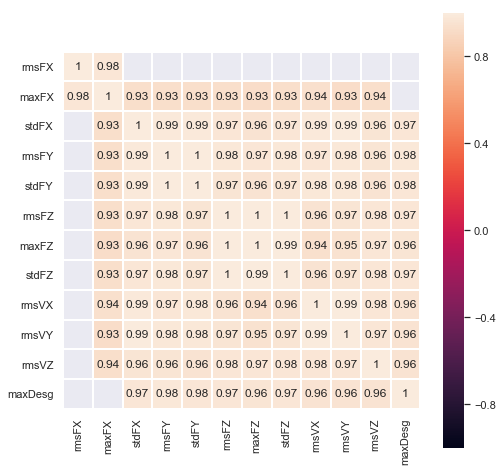

In [32]:
# Gerando a correlação das características do experimento 1
#corr1 = df1.drop(['maxDesg'], axis = 1).corr()
corr1 = X1.corr()

sns.set(font_scale = 1)
plt.figure(figsize = (8, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr1[(corr1 >= 0.9) | (corr1 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);

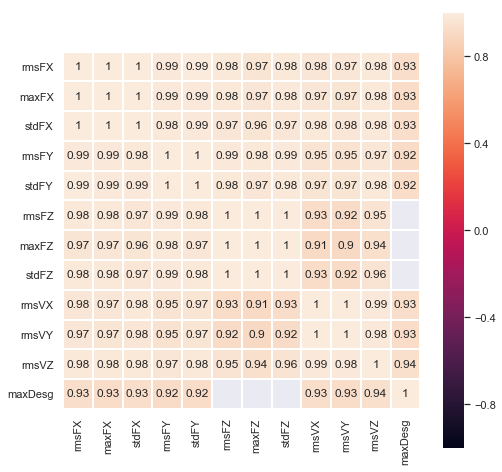

In [33]:
# Gerando a correlação das características do experimento 4
#corr4 = df4.drop(['maxDesg'], axis = 1).corr()
corr4 = X4.corr()

sns.set(font_scale = 1)
plt.figure(figsize = (8, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr4[(corr4 >= 0.9) | (corr4 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);

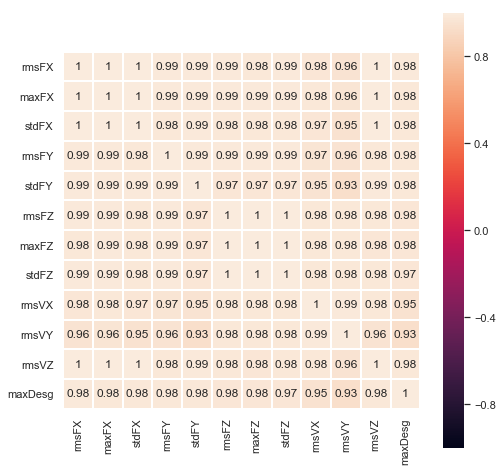

In [34]:
# Gerando a correlação das características do experimento 6
#corr6 = df6.drop(['maxDesg'], axis = 1).corr()
corr6 = X6.corr()

sns.set(font_scale = 1)
plt.figure(figsize = (8, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr6[(corr6 >= 0.9) | (corr6 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);

Analisando as correlações de características dadas pelos mapas de calores acima, percebemos que as seguintes variáveis são correlatas em todos os experimentos:

rmsFY e stdFY

rmsFZ e maxFZ

rmsFZ e stdFZ

Levando em consideração a importância das características, descartaremos as de menor valor: rmsFY e rmsFZ.
A característica maxFZ será mantida por não possuir corelação total com stdFZ.

In [35]:
# Descarta as características correlatas
X1 = X1.drop(['rmsFY', 'stdFY'], axis = 1)
X4 = X4.drop(['rmsFY', 'stdFY'], axis = 1)
X6 = X6.drop(['rmsFY', 'stdFY'], axis = 1)

In [36]:
X1.head(5)

,rmsFX,maxFX,stdFX,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,0.93297,3.744,0.84247,1.3298,4.560,1.1275,0.076914,0.077509,0.078697,48.893
1,2.12960,8.427,1.86500,1.9706,7.410,1.6836,0.085411,0.085716,0.087895,49.571
2,3.20850,11.534,2.67210,3.2554,11.815,2.6897,0.095767,0.094333,0.098742,50.303
3,3.65870,11.788,2.99260,3.7204,12.852,3.1213,0.099040,0.097245,0.102260,51.084
4,4.11040,12.555,2.97980,3.4897,11.704,3.2947,0.085091,0.084096,0.092056,52.250


In [37]:
X4.head(5)

,rmsFX,maxFX,stdFX,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,2.5039,6.974,1.6977,1.4523,5.565,1.4112,0.076008,0.076204,0.078940,31.416
1,2.5039,6.974,1.6977,1.4523,5.565,1.4112,0.076008,0.076204,0.078940,34.893
2,3.5827,9.765,2.6111,2.2215,7.866,2.1286,0.083401,0.080641,0.086471,38.103
3,4.2697,11.524,3.1355,2.8719,10.008,2.7291,0.084174,0.081514,0.088409,41.061
4,3.7905,11.112,2.8576,3.1242,10.688,2.8077,0.083719,0.081450,0.089046,43.781


In [38]:
X6.head(5)

,rmsFX,maxFX,stdFX,rmsFZ,maxFZ,stdFZ,rmsVX,rmsVY,rmsVZ,maxDesg
0,1.0182,3.658,0.84082,1.0135,3.773,1.0049,0.063757,0.065580,0.068373,62.789
1,2.1354,7.369,1.40150,2.2173,7.631,2.1500,0.074639,0.081759,0.085200,64.136
2,3.1507,9.726,1.94460,3.4121,9.747,3.2556,0.079383,0.096047,0.103450,65.365
3,3.6598,10.755,2.26780,3.8300,10.624,3.6368,0.085467,0.103610,0.114660,66.487
4,3.6672,11.007,2.24420,3.9026,10.588,3.6753,0.093899,0.115170,0.126000,67.511


In [39]:
# Descarta os nomes das características correlatas
names = names[names != ('rmsFY')]
names = names[names != ('stdFY')]
print(names)

['rmsFX' 'maxFX' 'stdFX' 'rmsFZ' 'maxFZ' 'stdFZ' 'rmsVX' 'rmsVY' 'rmsVZ']


As 9 características restantes serão utilizadas para a construção dos modelos de predição.

<h3>Construção dos modelos de predição</h3>

<h4>Redes neurais</h4>

Queremos que nossa rede neural, a partir das 9 características selecionadas, nos dê como resposta o desgaste da máquina até o instante atual. Posteriormente, o desgaste atual será utilizado para estimar a quantidade de cortes restantes que a máquina pode fazer a partir de um modelo ARMA.

Utilizaremos os experimentos 1 e 6 para treinamento, enquanto o experimento 4 servirá para teste.

In [40]:
Xtrain = X1.append(X6, ignore_index = True, sort = False)
Ytrain = Y1.append(Y6, ignore_index = True)
print(Xtrain.shape)
print(Ytrain.shape)

(630, 10)
(630,)


In [41]:
Xtest = X4
Ytrue = Y4
print(Xtest.shape)
print(Ytrue.shape)

(315, 10)
(315,)


Normalizando os dados

In [42]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
print(Xtrain)
print(Xtest)

[[-1.11915644 -1.24582747 -1.12363117 ... -1.01858809 -1.00154776
  -1.92240279]
 [-1.06030993 -1.13466411 -1.05806921 ... -0.94939098 -0.92628071
  -1.9056802 ]
 [-1.00725302 -1.06091127 -1.00632007 ... -0.87673697 -0.83751992
  -1.88762572]
 ...
 [ 1.46971156  1.67380707  2.02328439 ...  1.84179793  2.73777153
   2.65305181]
 [ 1.49110349  1.72721675  2.05014958 ...  1.84584503  2.71510468
   2.65699814]
 [ 1.50998741  1.72697938  2.07207772 ...  1.83673904  2.72656085
   2.66094448]]
[[-1.04190304 -1.1691549  -1.06879605 ... -1.02959116 -0.9995593
  -2.35346588]
 [-1.04190304 -1.1691549  -1.06879605 ... -1.02959116 -0.9995593
  -2.26770709]
 [-0.98885104 -1.10290315 -1.01023123 ... -0.99218071 -0.93793327
  -2.18853375]
 ...
 [ 1.11932645  1.25293874  1.60479017 ... -0.28411395 -0.11260605
   2.02163824]
 [ 1.14012826  1.26124692  1.63114242 ... -0.29397877 -0.12815371
   2.04802935]
 [ 1.16796236  1.28094916  1.66679169 ... -0.30662599 -0.16604091
   2.07392717]]


In [43]:
nnRegressor = MLPRegressor(solver = 'lbfgs', random_state = 1)
nnRegressor.fit(Xtrain, Ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
result = nnRegressor.predict(Xtest)
print(result)

[ 34.7057638   37.44412143  39.83879216  42.38574985  44.76644638
  47.05165919  49.12295462  51.08597697  52.7684357   54.4359571
  55.97932843  57.29636701  58.32794661  59.44999291  60.47537578
  61.39004118  62.12687319  62.78975284  63.25855634  63.68805773
  64.12776367  64.49734874  64.75611261  64.88962627  65.0624687
  65.18707815  65.31718472  65.35809527  65.30660635  65.36035547
  65.32949103  65.32227936  65.41831645  65.39593799  65.41763356
  65.77130731  66.30558057  66.71804524  67.07482944  67.43339765
  67.78718769  68.17573485  68.57572518  69.02839911  69.44602594
  69.85181155  70.20756034  70.5358754   70.9397102   71.43824997
  71.87513607  72.3478814   72.78833335  73.14843864  73.521847
  73.95928792  74.38130133  74.91402028  75.45268606  75.87423274
  76.23610096  76.65791674  77.12150383  77.59241318  78.26482684
  78.82903806  79.35770673  79.83441165  80.2757808   80.6433884
  81.08940033  81.60245691  82.1024628   82.60830005  83.02909051
  83.43005707  

In [45]:
print(nnRegressor.score(Xtest, Ytrue))

0.9990842875444598


<h4>ARMA</h4>

In [46]:
YTrainARMA = (Y1 + Y6) / 2
thresholdIdx = 300
threshold = YTrainARMA.iloc[thresholdIdx]
modelARMA = sm.tsa.ARMA(YTrainARMA, order=(2, 2))
fitARMA = modelARMA.fit(disp = False)

C:\Users\Iarah\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Iarah\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
# exemplo de predição do desgaste do corte 250 ao 300
yPred = fitARMA.predict(250, 300)
print(yPred)

250    162.387835
251    163.356007
252    164.327656
253    165.287618
254    166.262447
255    167.232962
256    168.202561
257    169.021218
258    169.894212
259    170.805046
260    171.690829
261    172.579448
262    173.469833
263    174.359913
264    175.249874
265    176.129776
266    177.014650
267    177.889951
268    178.779899
269    179.655294
270    180.544851
271    181.420259
272    182.289669
273    183.164915
274    184.030235
275    184.910154
276    185.765461
277    186.639896
278    187.490611
279    188.360062
280    189.225920
281    190.070356
282    190.935145
283    191.775907
284    192.635330
285    193.471010
286    194.325464
287    195.166237
288    196.000636
289    195.842162
290    196.175324
291    196.549208
292    196.877925
293    197.210277
294    197.545888
295    197.870969
296    198.200788
297    198.531170
298    198.830898
299    199.165672
300    199.482014
dtype: float64


<h3>Prognóstico com redes neurais e ARMA</h3>

Exemplo de prognóstico

In [48]:
# Seleciona a medição 126 para prever o desgaste e o número de
# cortes que podem ser feitos até atingir o limiar predefinido
instanceIdx = 125
testInstance = [Xtest[instanceIdx]]
dmg = nnRegressor.predict(testInstance)
dmg = dmg[0]
actualCut = 0
while True:
    dmgPred = fitARMA.predict(actualCut, actualCut + 1)
    actualCut += 1
    if (dmgPred[actualCut] >= dmg):
        break
print('Corte atual predito')
print(actualCut)
thresholdCut = actualCut
while True:
    dmgPred = fitARMA.predict(thresholdCut, thresholdCut + 1)
    thresholdCut += 1
    if (dmgPred[thresholdCut] >= threshold):
        break
remainingCuts = thresholdCut - actualCut;
actualRemainingCuts = thresholdIdx - instanceIdx;
print('Cortes restantes preditos')
print(remainingCuts)
print('Cortes restantes reais')
print(actualRemainingCuts)

Corte atual predito
50
Cortes restantes preditos
251
Cortes restantes reais
175


Plotagem do gráfico do prognóstico

196.31


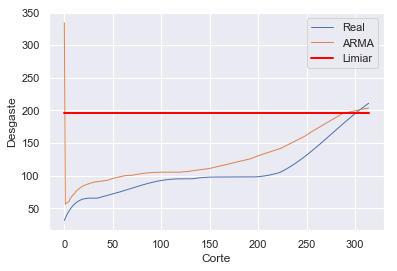

In [49]:
xx = [i for i, _ in enumerate(Xtest)]
yy = fitARMA.predict(0, 314)
yThreshold = [Ytrue[thresholdCut] for i, _ in enumerate(Xtest)]
print(Ytrue[thresholdCut])

plt.plot(xx, Ytrue, '-', linewidth = 1, label = 'Real')
plt.legend()
plt.plot(xx, yy, '-', linewidth = 1, label = 'ARMA')
plt.legend()
plt.plot(xx, yThreshold, '-', linewidth = 2, label = 'Limiar', c = 'red')
plt.legend()
plt.xlabel('Corte')
plt.ylabel('Desgaste')
plt.show()